## TurboFan HPC Efficiency Preductor

### 1. Problem Statement
- This project understands how the Turbofan HPC Efficiency is affected by other variables such as Engine pressor ratio , HP Spool speed, Fuel Flow , Specific Thrust
- To build a model to predict Turbofan HPC Efficiency based on the other parameters

### 2. Data Collection
- Dataset Source - https://www.kaggle.com/datasets/nicolascaparroz/turbofan-hpc-efficiency
- The data consists of 17 column and 11971 rows.

###  2.1 Import Data and Required Packages

In [5]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [6]:
# importing Data
data = pd.read_csv(r"C:\Users\shree\Desktop\subject\Data_Science\Data_Science_Project\Bankruptcy Prevention-Classification\Data\Turbofan_HPC_Efficiency.csv")

#### Show Top 5 Records

In [7]:
data.head(5)

NetThrust_kN  CoreNozzleGrossThrust_kN  BypassNozzleGrossThrust_kN  \
0     38.467255                 11.217579                  102.952769   
1     44.217856                 13.586609                  108.449503   
2     38.413089                 11.196754                  102.897310   
3     34.905462                  9.798766                   99.285488   
4     38.788102                 11.340700                  103.280789   

   Sp.FuelConsumption_g/(kN*s)  SpecificThrust_m/s  CoreNozzleVel.V8_m/s  \
0                    14.349541          120.587661            445.559446   
1                    15.271965          134.847057            512.666723   
2                    14.342064          120.453052            444.968535   
3                    13.898886          111.670620            407.283489   
4                    14.394312          121.384538            449.064098   

   CoreNozzlePressureRatio  BypassNozzleVel.V18_m/s  \
0                 1.666404               308.277091   
1                 1.838548               310.964933   
2                 1.664960               308.252517   
3                 1.570330               306.645196   
4                 1.674947               308.422881   

   BypassNozzlePressureRatio  BurnerEfficiency  EnginePressureRatioP5/P2  \
0                   2.342404          0.999534                  1.103993   
1                   2.424760          0.999713                  1.218305   
2                   2.341573          0.999532                  1.103032   
3                   2.287458          0.999362                  1.039987   
4                   2.347317          0.999547                  1.109677   

   HPSpoolSpeed_RPM  LPSpoolSpeed_RPM  FuelFlow_kg/s  LPTExitPressureP5_kPA  \
0      14944.835419       3261.916032       0.551987              40.134570   
1      14944.835419       3457.002243       0.675294              44.290294   
2      14944.835419       3260.182614       0.550923              40.099662   
3      14944.835419       3143.194846       0.485147              37.807693   
4      14944.835419       3272.188503       0.558328              40.341220   

   LPTExitTemperatureT5_K  Isentr.HPCEfficiency  
0              722.008949              0.861717  
1              810.585622              0.789251  
2              721.251985              0.862491  
3              677.901510              0.911628  
4              726.539704              0.857156

#### Shape of the Dataset

In [8]:
data.shape

(11971, 17)

### 2.2 Dataset information
- NetThrust_kN: Net forward thrust generated when pushing air in the direction opposite to flight.
- CoreNozzleGrossThrust_kN: Thrust generated by hot air passing through the Core Nozzle, after exiting the Low-Pressure Turbine.
- BypassNozzleGrossThrust_kN: Thrust generated by cold-bypassed air passing through the outer Nozzle. This can represent up to 80% of the Turbofan's net
- Sp.FuelConsumption_g/(kN*s): Specific Fuel Consumption is the mass of fuel needed to provide the net thrust for a given period.
- SpecificThrust_m/s: Thrust per unit air mass flowrate of a jet engine and can be calculated by the ratio of net thrust/total intake airflow.
- CoreNozzleVel.V8_m/s: Air velocity at the exit of the Core Nozzle.
- CoreNozzlePressureRatio: Air pressure at the exit of the Core Nozzle.
- BypassNozzleVel.V18_m/s: Air velocity at the exit of the Bypass Nozzle.
- BypassNozzlePressureRatio: Air pressure at the exit of the Bypass Nozzle.
- BurnerEfficiency: Burner efficiency, accounting for losses during burning.
- EnginePressureRatioP5/P2: Total pressure ratio across a jet engine, measured as the ratio of the total pressure at the exit of the propelling
- HPSpoolSpeed_RPM: Rotational speed of the High-pressure Shaft.
- LPSpoolSpeed_RPM: Rotational speed of the Low-pressure Shaft.
- FuelFlow_kg/s: Rate at which fuel is being burned
- LPTExitPressureP5_kPA: Pressure at the exit of the Low-pressure Turbine.
- LPTExitTemperatureT5_K: Temperature at the exit of the Low-pressure Turbine.
- Isentr.HPCEfficiency: Isentropic efficiency of the High-pressure Compressor.

### 3. Data Checks to perform
- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

#### 3.1 Check Missing values

In [9]:
data.isna().sum()

NetThrust_kN                   0
CoreNozzleGrossThrust_kN       0
BypassNozzleGrossThrust_kN     0
Sp.FuelConsumption_g/(kN*s)    0
SpecificThrust_m/s             0
CoreNozzleVel.V8_m/s           0
CoreNozzlePressureRatio        0
BypassNozzleVel.V18_m/s        0
BypassNozzlePressureRatio      0
BurnerEfficiency               0
EnginePressureRatioP5/P2       0
HPSpoolSpeed_RPM               0
LPSpoolSpeed_RPM               0
FuelFlow_kg/s                  0
LPTExitPressureP5_kPA          0
LPTExitTemperatureT5_K         0
Isentr.HPCEfficiency           0
dtype: int64

#### There are no missing values in the dataset

#### 3.2 Check Duplicates

In [10]:
data.duplicated().sum()

0

#### There are no duplicates in the data

#### 3.3 Check data types

In [11]:
# Gaining information from data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11971 entries, 0 to 11970
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   NetThrust_kN                 11971 non-null  float64
 1   CoreNozzleGrossThrust_kN     11971 non-null  float64
 2   BypassNozzleGrossThrust_kN   11971 non-null  float64
 3   Sp.FuelConsumption_g/(kN*s)  11971 non-null  float64
 4   SpecificThrust_m/s           11971 non-null  float64
 5   CoreNozzleVel.V8_m/s         11971 non-null  float64
 6   CoreNozzlePressureRatio      11971 non-null  float64
 7   BypassNozzleVel.V18_m/s      11971 non-null  float64
 8   BypassNozzlePressureRatio    11971 non-null  float64
 9   BurnerEfficiency             11971 non-null  float64
 10  EnginePressureRatioP5/P2     11971 non-null  float64
 11  HPSpoolSpeed_RPM             11971 non-null  float64
 12  LPSpoolSpeed_RPM             11971 non-null  float64
 13  FuelFlow_kg/s   

#### 3.4 Renaming some coulmns for easy data handling

In [12]:
data = data.rename(columns={"NetThrust_kN": "NThrust", "CoreNozzleGrossThrust_kN": "grossthrust", "Sp.FuelConsumption_g/(kN*s)": "Fuelconsumption", "SpecificThrust_m/s": "SpecificThrust","CoreNozzleVel.V8_m/s": "CoreNozzleVel", "CoreNozzlePressureRatio": "CoreNozzlePressureRatio", "BypassNozzleVel.V18_m/s": "BypassNozzleVel", "EnginePressureRatioP5/P2": "EnginePressureRatio", "HPSpoolSpeed_RPM": "HPSpoolSpeed", "LPSpoolSpeed_RPM": "LPSpoolSpeed", "FuelFlow_kg/s": "FuelFlow", "LPTExitPressureP5_kPA": "LPTExitPressure", "LPTExitTemperatureT5_K": "LPTExitTemperature", "Isentr.HPCEfficiency": "IsentrHPCEfficiency" })
data.head(5)

NThrust  grossthrust  BypassNozzleGrossThrust_kN  Fuelconsumption  \
0  38.467255    11.217579                  102.952769        14.349541   
1  44.217856    13.586609                  108.449503        15.271965   
2  38.413089    11.196754                  102.897310        14.342064   
3  34.905462     9.798766                   99.285488        13.898886   
4  38.788102    11.340700                  103.280789        14.394312   

   SpecificThrust  CoreNozzleVel  CoreNozzlePressureRatio  BypassNozzleVel  \
0      120.587661     445.559446                 1.666404       308.277091   
1      134.847057     512.666723                 1.838548       310.964933   
2      120.453052     444.968535                 1.664960       308.252517   
3      111.670620     407.283489                 1.570330       306.645196   
4      121.384538     449.064098                 1.674947       308.422881   

   BypassNozzlePressureRatio  BurnerEfficiency  EnginePressureRatio  \
0                   2.342404          0.999534             1.103993   
1                   2.424760          0.999713             1.218305   
2                   2.341573          0.999532             1.103032   
3                   2.287458          0.999362             1.039987   
4                   2.347317          0.999547             1.109677   

   HPSpoolSpeed  LPSpoolSpeed  FuelFlow  LPTExitPressure  LPTExitTemperature  \
0  14944.835419   3261.916032  0.551987        40.134570          722.008949   
1  14944.835419   3457.002243  0.675294        44.290294          810.585622   
2  14944.835419   3260.182614  0.550923        40.099662          721.251985   
3  14944.835419   3143.194846  0.485147        37.807693          677.901510   
4  14944.835419   3272.188503  0.558328        40.341220          726.539704   

   IsentrHPCEfficiency  
0             0.861717  
1             0.789251  
2             0.862491  
3             0.911628  
4             0.857156

#### 3.5 Check statistics of data set

In [13]:
data.describe()

NThrust   grossthrust  BypassNozzleGrossThrust_kN  \
count  11971.000000  11971.000000                11971.000000   
mean      38.628892     11.282205                  103.084040   
std        2.274080      0.904578                    2.283309   
min       33.880462      9.396328                   98.189039   
25%       36.985668     10.639180                  101.432144   
50%       38.491947     11.227067                  102.978045   
75%       40.185508     11.884030                  104.686696   
max       44.371966     13.657509                  108.580079   

       Fuelconsumption  SpecificThrust  CoreNozzleVel  \
count     11971.000000    11971.000000   11971.000000   
mean         14.390388      120.971383     447.777292   
std           0.322028        5.655847      25.250795   
min          13.794478      109.088315     396.634698   
25%          14.153845      116.896573     429.511069   
50%          14.352957      120.649011     445.828846   
75%          14.598812      124.849105     464.655773   
max          15.302824      135.234720     514.668257   

       CoreNozzlePressureRatio  BypassNozzleVel  BypassNozzlePressureRatio  \
count             11971.000000     11971.000000               11971.000000   
mean                  1.671937       308.353413                   2.344368   
std                   0.063290         1.043508                   0.034206   
min                   1.543633       306.188355                   2.271034   
25%                   1.626697       307.604225                   2.319622   
50%                   1.667061       308.288297                   2.342782   
75%                   1.713272       309.060025                   2.368381   
max                   1.843981       311.042031                   2.426716   

       BurnerEfficiency  EnginePressureRatio  HPSpoolSpeed  LPSpoolSpeed  \
count      11971.000000         11971.000000  1.197100e+04  11971.000000   
mean           0.999530             1.107641  1.494484e+04   3266.978242   
std            0.000091             0.042098  7.276262e-12     74.908588   
min            0.999302             1.022178  1.494484e+04   3109.219926   
25%            0.999470             1.077561  1.494484e+04   3213.954990   
50%            0.999535             1.104430  1.494484e+04   3262.706431   
75%            0.999597             1.135158  1.494484e+04   3317.117584   
max            0.999717             1.221906  1.494484e+04   3462.991480   

           FuelFlow  LPTExitPressure  LPTExitTemperature  IsentrHPCEfficiency  
count  11971.000000     11971.000000        11971.000000         11971.000000  
mean       0.556615        40.267222          726.066460             0.860237  
std        0.045388         1.530415           31.744915             0.030808  
min        0.467363        37.160277          666.834749             0.787461  
25%        0.523489        39.173684          702.419292             0.837972  
50%        0.552473        40.150476          722.354795             0.861365  
75%        0.586661        41.267561          747.044980             0.882846  
max        0.679016        44.421186          813.242376             0.925880

#### Insight
- All columns have same data type as float and from mean and median values we can say that all columns except 2-3 columns don't have any outliers
- All standard deviations are also close - between 0 and 2 except LPTExitTemperature which is 31.74
- The values are spread in the wide range we have to make them between a one range by scaling

### 3.7 Exploring Data

In [14]:
data.head()

NThrust  grossthrust  BypassNozzleGrossThrust_kN  Fuelconsumption  \
0  38.467255    11.217579                  102.952769        14.349541   
1  44.217856    13.586609                  108.449503        15.271965   
2  38.413089    11.196754                  102.897310        14.342064   
3  34.905462     9.798766                   99.285488        13.898886   
4  38.788102    11.340700                  103.280789        14.394312   

   SpecificThrust  CoreNozzleVel  CoreNozzlePressureRatio  BypassNozzleVel  \
0      120.587661     445.559446                 1.666404       308.277091   
1      134.847057     512.666723                 1.838548       310.964933   
2      120.453052     444.968535                 1.664960       308.252517   
3      111.670620     407.283489                 1.570330       306.645196   
4      121.384538     449.064098                 1.674947       308.422881   

   BypassNozzlePressureRatio  BurnerEfficiency  EnginePressureRatio  \
0                   2.342404          0.999534             1.103993   
1                   2.424760          0.999713             1.218305   
2                   2.341573          0.999532             1.103032   
3                   2.287458          0.999362             1.039987   
4                   2.347317          0.999547             1.109677   

   HPSpoolSpeed  LPSpoolSpeed  FuelFlow  LPTExitPressure  LPTExitTemperature  \
0  14944.835419   3261.916032  0.551987        40.134570          722.008949   
1  14944.835419   3457.002243  0.675294        44.290294          810.585622   
2  14944.835419   3260.182614  0.550923        40.099662          721.251985   
3  14944.835419   3143.194846  0.485147        37.807693          677.901510   
4  14944.835419   3272.188503  0.558328        40.341220          726.539704   

   IsentrHPCEfficiency  
0             0.861717  
1             0.789251  
2             0.862491  
3             0.911628  
4             0.857156

#### 3.7.1 Adding columns for "CoreNozzleGrossThrust_kN" and "BypassNozzleGrossThrust_kN" in to "ThrustRatio

In [16]:
data['ThrustRatio'] = data['grossthrust'] / data['BypassNozzleGrossThrust_kN']

In [17]:
data

NThrust  grossthrust  BypassNozzleGrossThrust_kN  Fuelconsumption  \
0      38.467255    11.217579                  102.952769        14.349541   
1      44.217856    13.586609                  108.449503        15.271965   
2      38.413089    11.196754                  102.897310        14.342064   
3      34.905462     9.798766                   99.285488        13.898886   
4      38.788102    11.340700                  103.280789        14.394312   
...          ...          ...                         ...              ...   
11966  37.517463    10.849962                  101.977175        14.223518   
11967  36.443150    10.420494                  100.877732        14.083720   
11968  39.038498    11.437430                  103.534981        14.430011   
11969  40.184014    11.883436                  104.685200        14.598583   
11970  36.643368    10.501735                  101.081563        14.109195   

       SpecificThrust  CoreNozzleVel  CoreNozzlePressureRatio  \
0          120.587661     445.559446                 1.666404   
1          134.847057     512.666723                 1.838548   
2          120.453052     444.968535                 1.664960   
3          111.670620     407.283489                 1.570330   
4          121.384538     449.064098                 1.674947   
...               ...            ...                      ...   
11966      118.224634     435.256994                 1.641071   
11967      115.536696     423.645148                 1.611873   
11968      122.006397     451.840761                 1.681735   
11969      124.845437     464.638801                 1.713230   
11970      116.039911     425.826138                 1.617411   

       BypassNozzleVel  BypassNozzlePressureRatio  BurnerEfficiency  \
0           308.277091                   2.342404          0.999534   
1           310.964933                   2.424760          0.999713   
2           308.252517                   2.341573          0.999532   
3           306.645196                   2.287458          0.999362   
4           308.422881                   2.347317          0.999547   
...                ...                        ...               ...   
11966       307.847233                   2.327787          0.999494   
11967       307.353894                   2.311314          0.999444   
11968       308.536536                   2.351126          0.999556   
11969       309.059340                   2.368360          0.999597   
11970       307.446052                   2.314371          0.999453   

       EnginePressureRatio  HPSpoolSpeed  LPSpoolSpeed  FuelFlow  \
0                 1.103993  14944.835419   3261.916032  0.551987   
1                 1.218305  14944.835419   3457.002243  0.675294   
2                 1.103032  14944.835419   3260.182614  0.550923   
3                 1.039987  14944.835419   3143.194846  0.485147   
4                 1.109677  14944.835419   3272.188503  0.558328   
...                    ...           ...           ...       ...   
11966             1.087132  14944.835419   3231.451875  0.533630   
11967             1.067685  14944.835419   3195.697463  0.513255   
11968             1.114191  14944.835419   3280.190204  0.563326   
11969             1.135130  14944.835419   3317.067861  0.586630   
11970             1.071374  14944.835419   3202.430408  0.517008   

       LPTExitPressure  LPTExitTemperature  IsentrHPCEfficiency  ThrustRatio  
0            40.134570          722.008949             0.861717     0.108958  
1            44.290294          810.585622             0.789251     0.125281  
2            40.099662          721.251985             0.862491     0.108815  
3            37.807693          677.901510             0.911628     0.098693  
4            40.341220          726.539704             0.857156     0.109805  
...                ...                 ...                  ...          ...  
11966        39.521629          709.172210             0.875314     

### 4. Exploring Data (Visualization)

#### 4.1 Visualize average score distribution to make some conclusion.
- Histogram and Kernel Distribution Function (KDE)
- Scatter plots
- Box plots
- Heatmap

### 4. Exploring Data ( Visualization )

#### 4.1.1 Box plots
Checking for outliers using boxplots

{'whiskers': [<matplotlib.lines.Line2D at 0x1ee2eeb89d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ee2eeb8f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ee2eeb8730>,
 'medians': [<matplotlib.lines.Line2D at 0x1ee2eed4490>,
 'fliers': [<matplotlib.lines.Line2D at 0x1ee2eed4730>,
 'means': []}

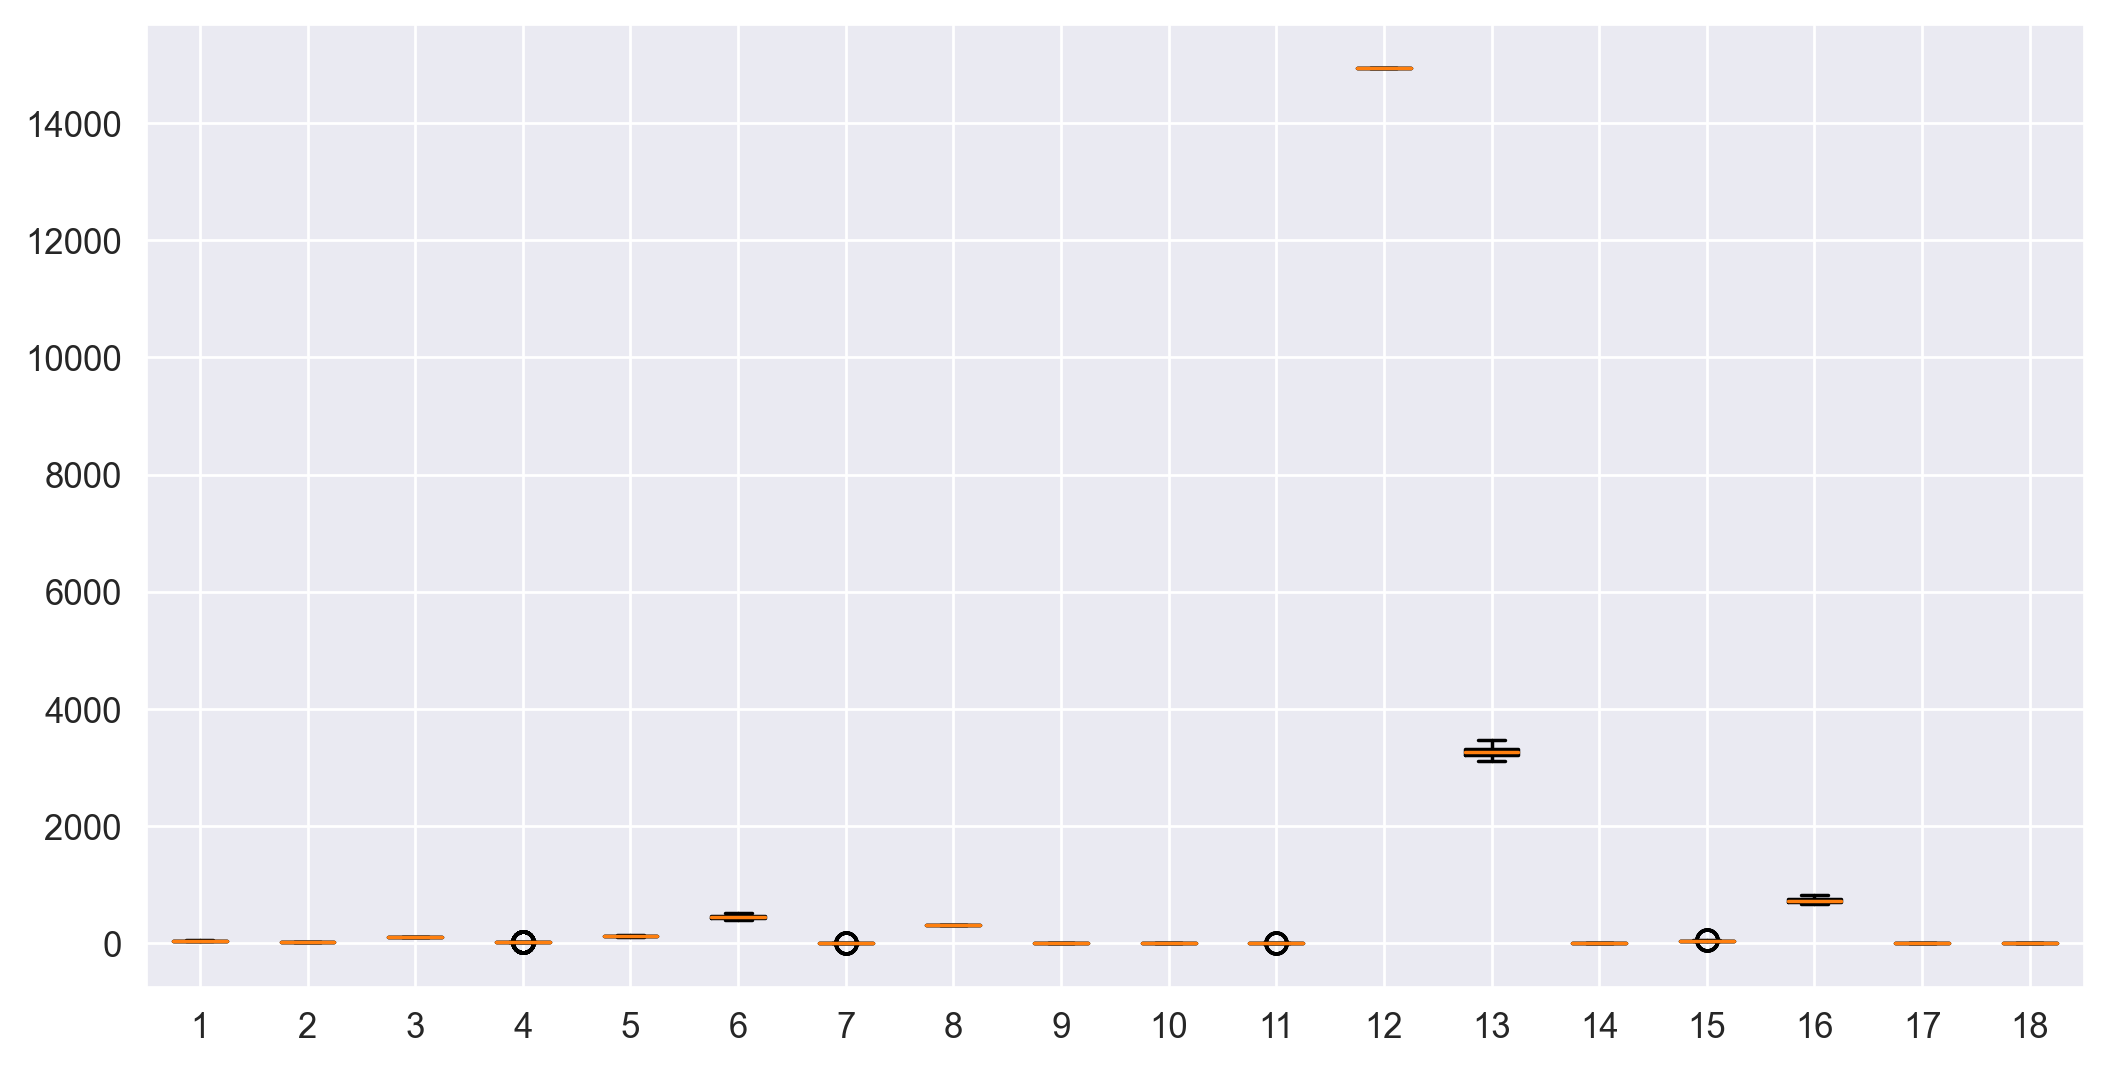

In [18]:
plt.boxplot(data)

#### Insights
- from boxplots we can see that Outliers presents in column FuelConsumption,CoreNozzlePressureRatio,EnginePressureRatio,LPTExitTemperature

#### Outlier Removal from thr Four Columns

In [19]:
# removes Outliers from the column
def outlier_cap(df,column):
     """
    Removes outliers from the given column in the datafram.

    Parameters:
    - df: pandas DataFrame
    - column: str, the column for which we want to remove outliers
    """
    # iterate columns in the dataframe
    
     for index,row in df.iterrows():
        
        # defining 75th and 25th percentile
        h = df[column].quantile(0.75)
        l = df[column].quantile(0.25)
        
        # Calculation the Interquartile Range 
        IQR = h - l
        
        # maximum and minimum value to replace for a Outlier from a column
        upper_threshold = h + 1.5*IQR
        lower_threshold = l - 1.5*IQR
        
        # Replacing the Outliers using ifelse conditions
        if row[column] > upper_threshold:
            df.at[index, column] = upper_threshold
        elif row[column] < lower_threshold:
            df.at[index, column] = lower_threshold

In [20]:
col = ['Fuelconsumption','CoreNozzlePressureRatio','EnginePressureRatio','LPTExitPressure']

In [21]:
for i in col:
    outlier_cap(data,i)

#### 4.1.2 Checking Correalation Between Features

In [22]:
data.corr()

NThrust  grossthrust  BypassNozzleGrossThrust_kN  \
NThrust                     1.000000     0.999879                    0.999778   
grossthrust                 0.999879     1.000000                    0.999414   
BypassNozzleGrossThrust_kN  0.999778     0.999414                    1.000000   
Fuelconsumption             0.997810     0.998235                    0.996253   
SpecificThrust              0.999993     0.999861                    0.999833   
CoreNozzleVel               0.999744     0.999859                    0.999049   
CoreNozzlePressureRatio     0.999504     0.999800                    0.998631   
BypassNozzleVel             0.999974     0.999961                    0.999621   
BypassNozzlePressureRatio   0.999777     0.999412                    1.000000   
BurnerEfficiency            0.991485     0.990523                    0.993778   
EnginePressureRatio         0.999530     0.999818                    0.998675   
HPSpoolSpeed                     NaN          NaN                         NaN   
LPSpoolSpeed                0.999891     0.999981                    0.999533   
FuelFlow                    0.999279     0.999487                    0.998284   
LPTExitPressure             0.999530     0.999818                    0.998675   
LPTExitTemperature          0.998009     0.998268                    0.996588   
IsentrHPCEfficiency        -0.999361    -0.998784                   -0.999863   
ThrustRatio                 0.999737     0.999838                    0.999546   

                            Fuelconsumption  SpecificThrust  CoreNozzleVel  \
NThrust                            0.997810        0.999993       0.999744   
grossthrust                        0.998235        0.999861       0.999859   
BypassNozzleGrossThrust_kN         0.996253        0.999833       0.999049   
Fuelconsumption                    1.000000        0.997579       0.999023   
SpecificThrust                     0.997579        1.000000       0.999667   
CoreNozzleVel                      0.999023        0.999667       1.000000   
CoreNozzlePressureRatio            0.999176        0.999419       0.999932   
BypassNozzleVel                    0.998114        0.999957       0.999848   
BypassNozzlePressureRatio          0.996247        0.999832       0.999047   
BurnerEfficiency                   0.980797        0.991942       0.988432   
EnginePressureRatio                0.999140        0.999448       0.999937   
HPSpoolSpeed                            NaN             NaN            NaN   
LPSpoolSpeed                       0.997876        0.999894       0.999750   
FuelFlow                           0.999596        0.999145       0.999872   
LPTExitPressure                    0.999140        0.999448       0.999937   
LPTExitTemperature                 0.999932        0.997778       0.999099   
IsentrHPCEfficiency               -0.995093       -0.999447      -0.998346   
ThrustRatio                        0.997044        0.999784       0.999397   

                            CoreNozzlePressureRatio  BypassNozzleVel  \
NThrust                                    0.999504         0.999974   
grossthrust                                0.999800         0.999961   
BypassNozzleGrossThrust_kN                 0.998631         0.999621   
Fuelconsumption                            0.999176         0.998114   
SpecificThrust                             0.999419         0.999957   
CoreNozzleVel                              0.999932         0.999848   
CoreNozzlePressureRatio                    1.000000         0.999689   
BypassNozzleVel                            0.999689         1.000000   
BypassNozzlePressureRatio                  0.998628         0.999620   
BurnerEfficiency                           0.987593         0.990907   
EnginePressureRatio                        1.000000         0.999710   
HPSpoolSpeed                                    NaN              NaN   
LPSpoolSpeed                               0.999670         0.999954  

<Axes: >

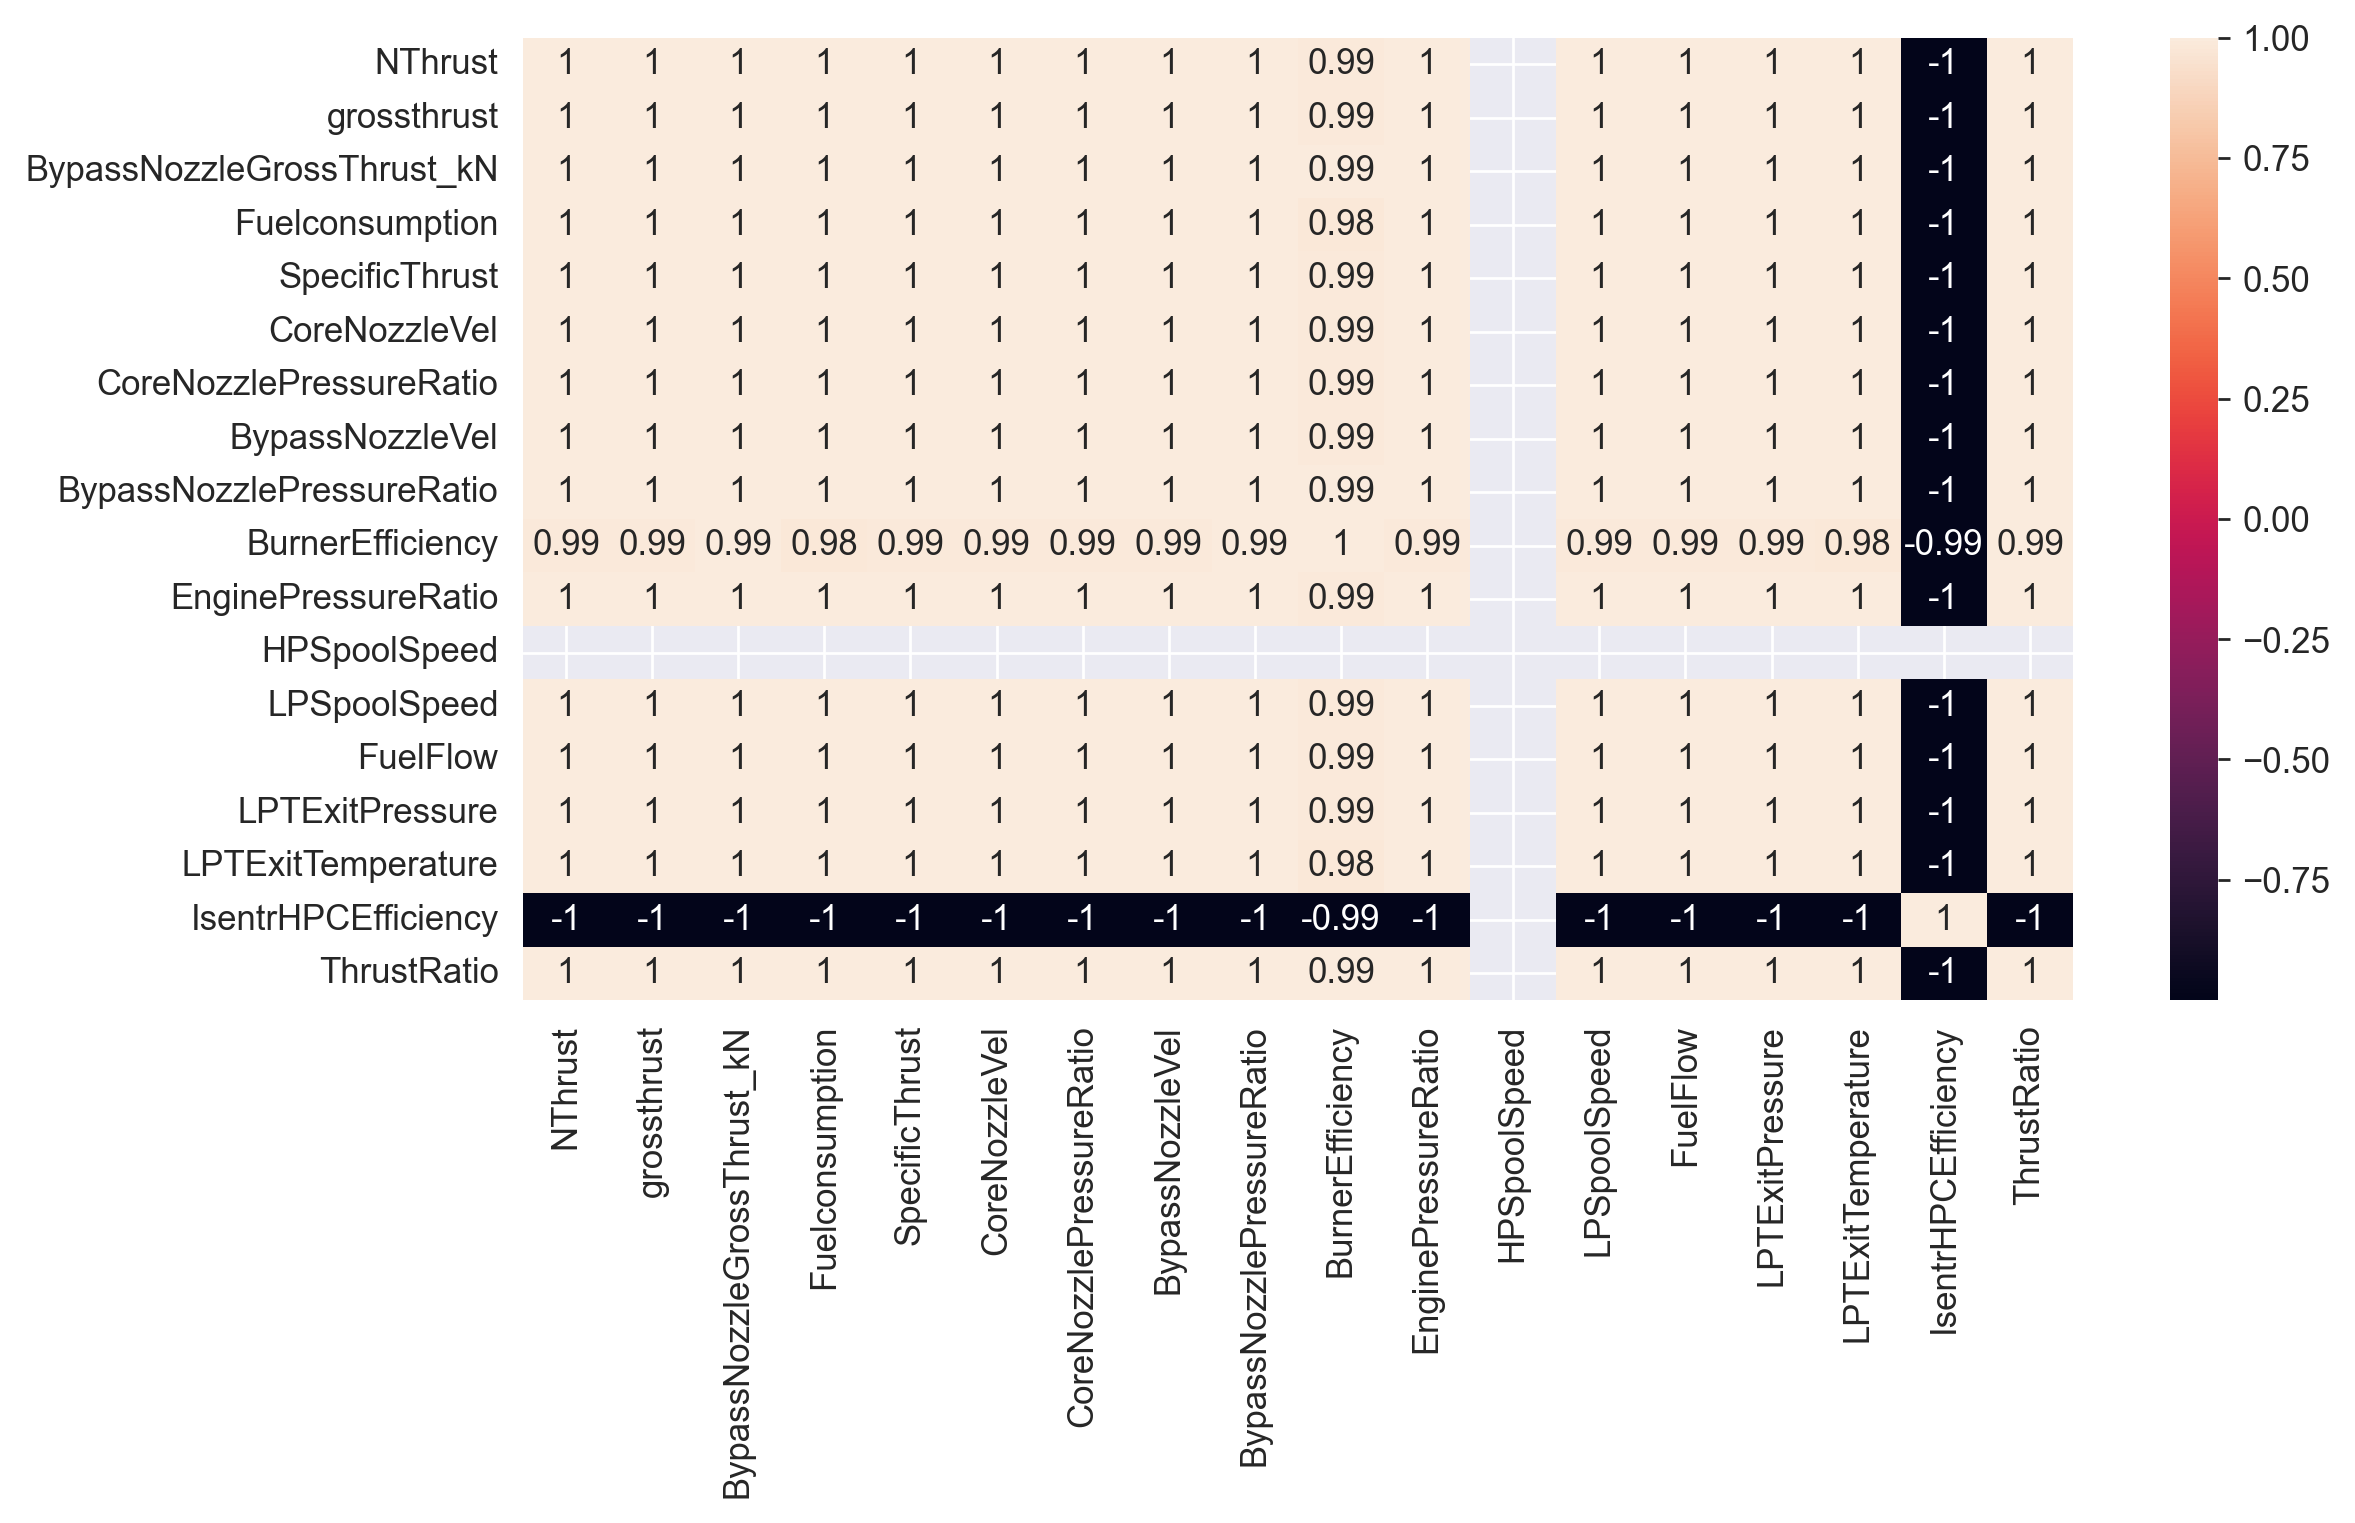

In [23]:
# Heatmap to visualize the relations
sns.heatmap(data.corr(),annot = True)

#### Insights
- From heat map we can say that almost all columns have perfect correlation with HPC Efficiency
- From heatmap it seems that the HPSpoolSpeed column is not correlated with the other columns but we keep it for future referance 
- Our target value, on the other hand, is inversly correlated with these features.

#### 4.1.3 Scatter plots

In [24]:
def scatter_plot(df, target_column):
    """
    Plot scatter plots for all columns in the DataFrame against the target column.

    Parameters:
    - df: pandas DataFrame
    - target_column: str, the column against which other columns will be plotted
    """

    # Get all columns except the target column
    features = df.columns[df.columns != target_column]

    # Determine the number of rows and columns for subplots
    num_plots = len(features)
    num_cols = 2  
    num_rows = (num_plots - 1) // num_cols + 1

    # Create subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))

    # Flatten axes if necessary
    axes = axes.flatten()

    # Loop through each feature and plot scatter plot
    for i, feature in enumerate(features):
        ax = axes[i]
        ax.scatter(df[feature], df[target_column], alpha=0.5)
        ax.set_title(f"{feature} vs {target_column}")
        ax.set_xlabel(feature)
        ax.set_ylabel(target_column)

    plt.tight_layout()
    plt.show()


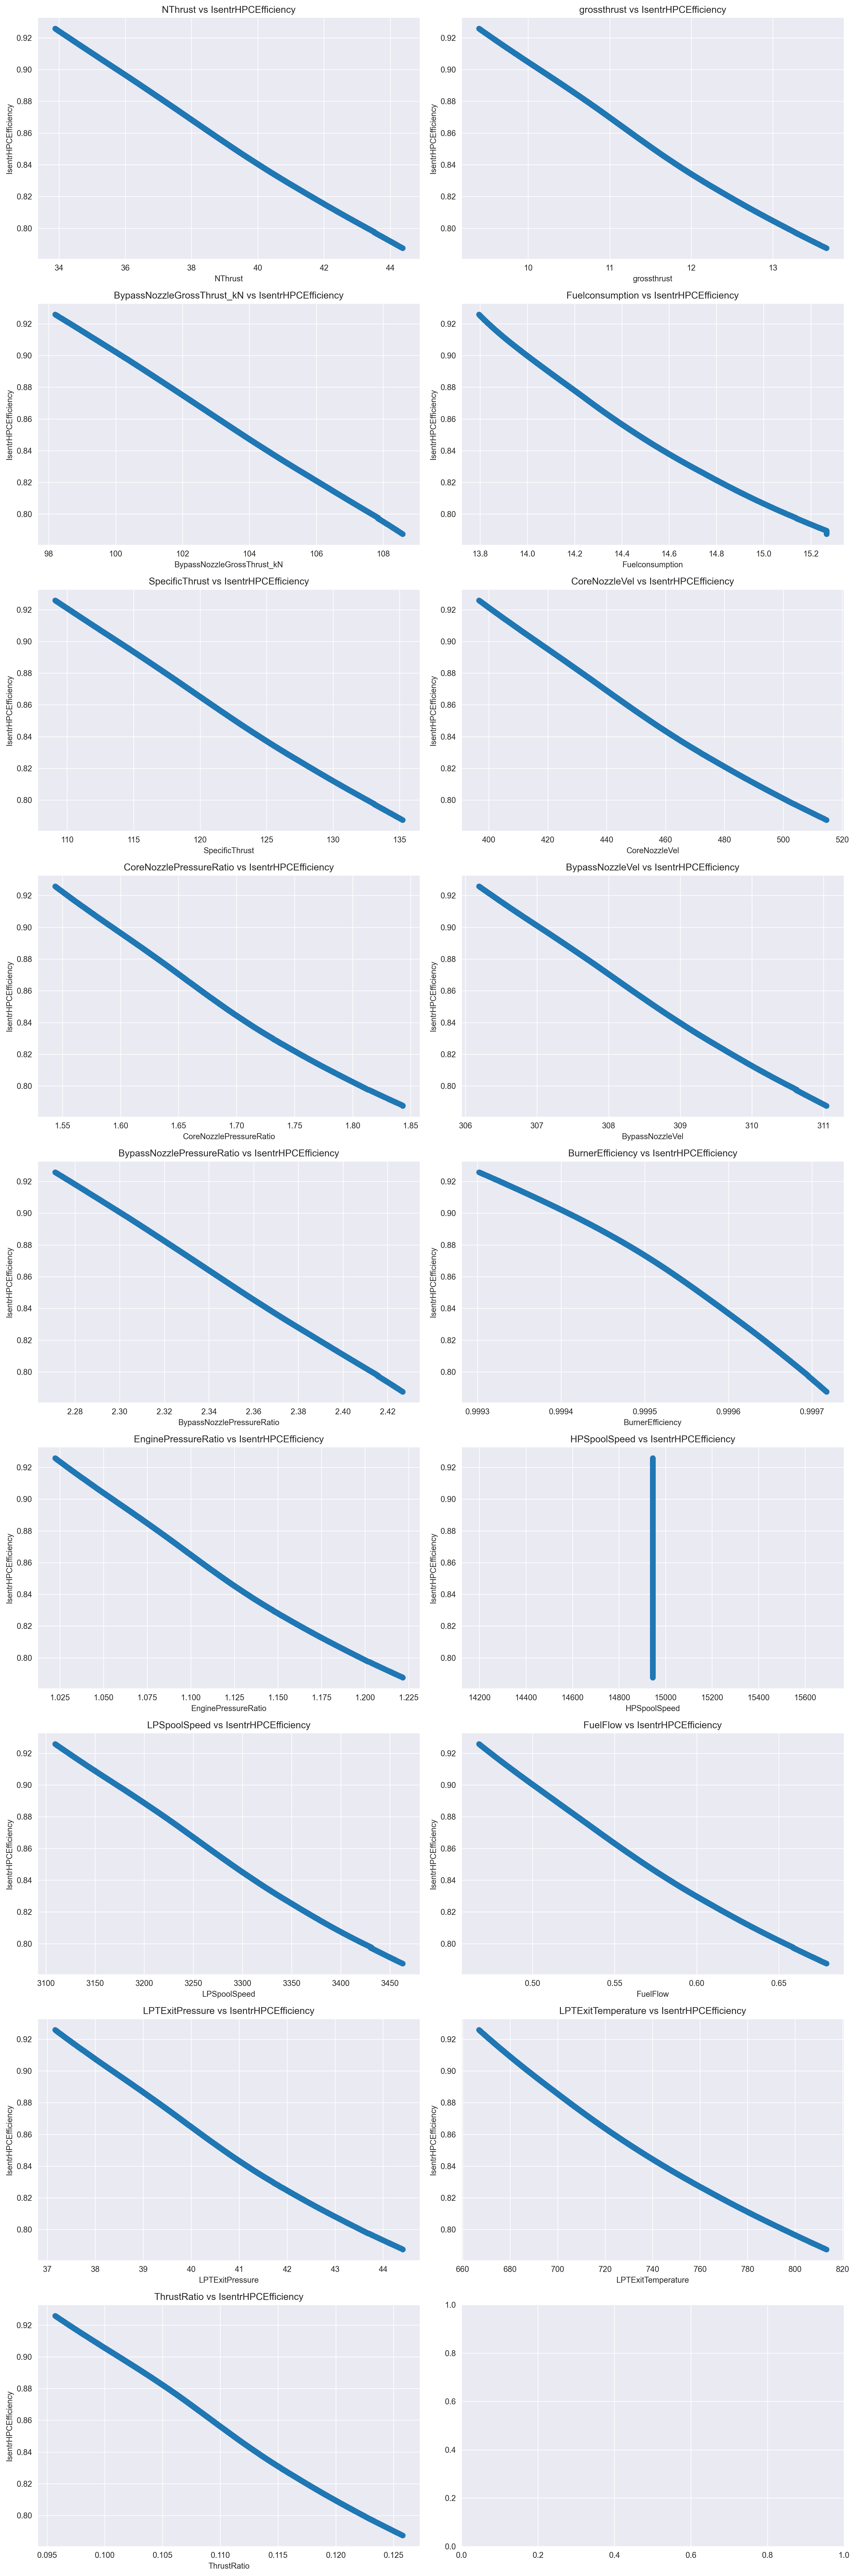

In [25]:
scatter_plot(data,'IsentrHPCEfficiency')

#### Insights
- As the correlation heatmap and scatter plot shows all columns are related linearly to each other 
- As HPC efficiency drops, the entire system must compensate for these losses in orther to keep the HPC rotation speed constant. The low pressure compressor rotates faster, increasing the pressure of the air exiting the LPC and entering the HPC. More fuel is burned as the efficiency drops as a way to compensate for the energy loss and this translates into higher temperatures and pressure at the exit of the low pressure turbine.That's why we got this linear relationships.

#### 4.1.4 Histogram and density plot

In [26]:
def density_plot(df, target_column):
    """
    Plot density plots for all columns in the DataFrame against the target column.

    Parameters:
    - df: pandas DataFrame
    - target_column: str, the column against which other columns will be plotted
    """

    # Get all columns except the target column
    features = df.columns[df.columns != target_column]

    # Determine the number of rows and columns for subplots
    num_plots = len(features)
    num_cols = 2  
    num_rows = (num_plots - 1) // num_cols + 1

    # Create subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))

    # Flatten axes if necessary
    axes = axes.flatten()

    # Loop through each feature and plot scatter plot
    for i, feature in enumerate(features):
        ax = axes[i]
        sns.histplot(data=df, x=feature, kde=True, ax=ax)
        ax.set_title(f"{feature} vs {target_column}")
        ax.set_xlabel(feature)
        ax.set_ylabel(target_column)

    plt.tight_layout()
    plt.show()

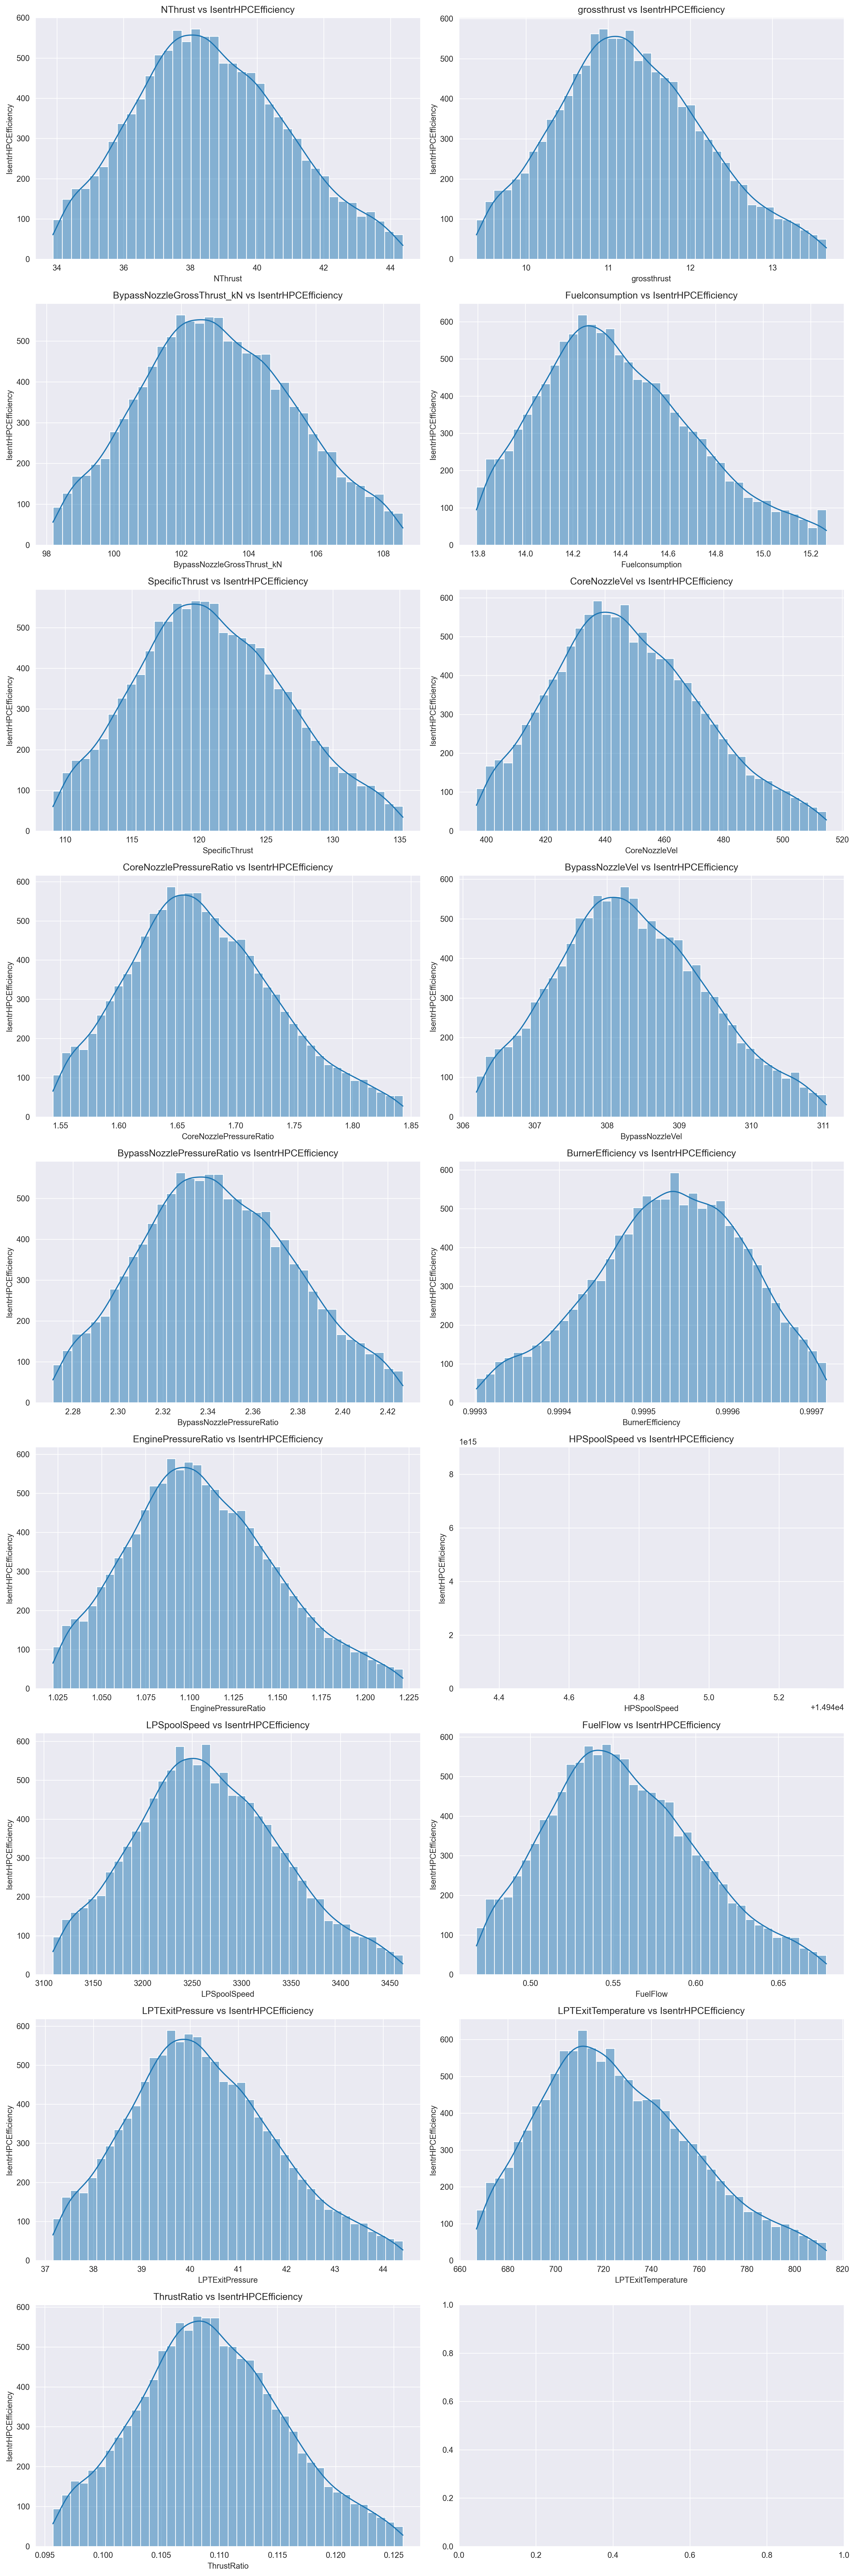

In [27]:
density_plot(data,'IsentrHPCEfficiency')

#### Insights
- from scatter plot and density plots we can say that except HPSpoolSpeed all other columns are linearly releated to isentropicHPCefficiency and all columns  are have nearly Normal Distrubution
- As all the columns have normal distrubution we dont need to use any transformations like log transform or square root transform